<a href="https://colab.research.google.com/github/arpitiiitv/Deep-Learning-End2End/blob/main/IMDb_Sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDb Sentiment classification**
IMDb is the world's most popular and authoritative source for information on movies, TV shows and celebrities. It is owned by **AMAZON.COM**. 
People rates movies and gives their feedback about perticular movies on IMDb site. 
## **Problem** : Given a movie review, predict if it is positive review or negative review.

## **Dataset** : I have used expert engineered dataset from keras. Which have 25000 training dataset.


# **IMDb dataset from keras**
 https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification
 <br>
 <br>
 This is a dataset of **25,000 movies reviews** from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

oov_char: int. The out-of-vocabulary character. Words that were cut out because of the num_words or skip_top limits will be replaced with this character.

D_train= (Xi,Yi) where i:1->25000
Xi is numeric vectors and Yi is 0 or 1.

In [1]:
# Long Short Term Memory for sequence classification in the IMDB dataset
# Importing Libraries
import tensorflow as tf
import numpy as np
from keras.layers import Dropout
from keras.models import Sequential
from keras.datasets import imdb
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
np.random.seed(7)

In [2]:
# load the dataset but only keep the top 6100 words, zero the rest
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = top_words)

In [3]:
print('Training dataset size: ',X_train.shape,y_train.shape)
print('Test dataset size: ',X_test.shape,y_test.shape)

Training dataset size:  (25000,) (25000,)
Test dataset size:  (25000,) (25000,)


In [4]:
print("First training data: ",X_train[1])
print("Number of words in first review: ",len(X_train[1]))
print("Maximum frequency of words: ",max(X_train[1]))

First training data:  [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
Number of words in first review:  189
Maximum frequency of words:  9837


# Padding and Truncation
### **Padding:** 
It is an operation which is used to make fixed size length for all reviews, let's say we want all the reviews to be of length of **K**, so we append **0** to the reviews untill its length becomes **K**.
If we will not use padding, we can perform all the tast but it will take more time as compared to padded dataset, without padding optimization problem will be like SGD with batch size equal to 1 and if we are using padding we can use SGD with some batch size for fast convergence.

### **Truncation:**
If some reviews contains more than **K**(length after padding), it will remove last words to make reviews of same size.


## **Embeddings:**
Credit : https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

Keras offers an Embedding layer that can be used for neural networks on text data.

It requires that the **input data be integer encoded**, so that **each word is represented by a unique integer**. This data preparation step can be performed using the Tokenizer API also provided with Keras.

The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.

The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:<br>
**input_dim:** This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
<br>
**output_dim:** This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.<br>
**input_length:** This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

For example, below we define an Embedding layer with a vocabulary of 200 (e.g. integer encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be embedded, and input documents that have 50 words each.

Keras Docs: https://keras.io/api/layers/core_layers/embedding/#embedding

# Padding and Truncation
Taking 800 as maximum length of any review.

In [5]:
# truncate and/or pad input sequences
max_review_length = 700
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print('-----------------------------------------------------------------------\n')
print('Training dataset size: ',X_train.shape,y_train.shape)
print('-----------------------------------------------------------------------\n')
print('Test dataset size: ',X_test.shape,y_test.shape)
print('-----------------------------------------------------------------------\n')
print("Length of review after padding: ",len(X_train[1]))
print('-----------------------------------------------------------------------\n\n\n')


-----------------------------------------------------------------------

Training dataset size:  (25000, 700) (25000,)
-----------------------------------------------------------------------

Test dataset size:  (25000, 700) (25000,)
-----------------------------------------------------------------------

Length of review after padding:  700
-----------------------------------------------------------------------





# **Crating model architecture**

In [18]:
from keras.optimizers import Adam
# model
# each words is represented as 12 dim vectors
nb_epoch = 25
batch_size = 128
embedding_vector_length = 12
# Taking sequential model
model = Sequential()
# Embedding the input sequence
model.add(Embedding(top_words+1, embedding_vector_length, input_length=max_review_length))
# using dropout to avoid overfitting
model.add(Dropout(0.90))
# adding 80 LSTM cells
model.add(LSTM(80))
model.add(Dense(1,activation='sigmoid'))
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 700, 12)           120012    
_________________________________________________________________
dropout_3 (Dropout)          (None, 700, 12)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 80)                29760     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 81        
Total params: 149,853
Trainable params: 149,853
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
history = model.fit(X_train, y_train, epochs=nb_epoch, batch_size=batch_size, verbose=1, validation_data=(X_test,y_test))
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/25
196/196 [==============================] - 10s 52ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6929 - val_accuracy: 0.5390
Epoch 2/25
196/196 [==============================] - 10s 50ms/step - loss: 0.6924 - accuracy: 0.5275 - val_loss: 0.6909 - val_accuracy: 0.5551
Epoch 3/25
196/196 [==============================] - 10s 50ms/step - loss: 0.6713 - accuracy: 0.5939 - val_loss: 0.6122 - val_accuracy: 0.7004
Epoch 4/25
196/196 [==============================] - 10s 50ms/step - loss: 0.5999 - accuracy: 0.6814 - val_loss: 0.4930 - val_accuracy: 0.7905
Epoch 5/25
196/196 [==============================] - 10s 50ms/step - loss: 0.5250 - accuracy: 0.7409 - val_loss: 0.4281 - val_accuracy: 0.8294
Epoch 6/25
196/196 [==============================] - 10s 50ms/step - loss: 0.4866 - accuracy: 0.7672 - val_loss: 0.3977 - val_accuracy: 0.8448
Epoch 7/25
196/196 [==============================] - 10s 50ms/step - loss: 0.4563 - accuracy: 0.7877 - val_loss: 0.3802 - val_accuracy:

In [20]:
# this function is used to update the plots for each epoch and error
import matplotlib.pyplot as plt
def plt_dynamic(x, vy, ty, ax):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    fig.canvas.draw()

Test score: 0.28318729996681213
Test accuracy: 0.8898400068283081


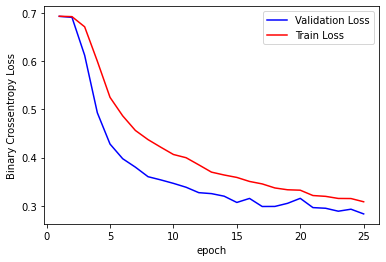

In [21]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# **Key Observations:**
### **LSTM based model got 88.98% accuracy after 25 epochs for IMDb sentiment classification task.**

*   Model can easily overfit if we use more complex model. Using 32 length embedding model was overfitting because It has less amount of data.
*   Using Stacked LSTM worsten the performance in this case.
* Without dropout it generalization error was very high, Dropout reduced the overfitting.
* The indication we  get from zig-zag pattern is that the learning rate is too large, you should decrease it until the loss starts to decrease. It seems that your learning rate is too large, making your parameters oscillate wildly.



